In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from matplotlib.colors import LogNorm
import seaborn as sns
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import ode
import scipy.ndimage
import glob
import os
from fractions import Fraction
import csv
import itertools
import math
from scipy import stats
import random

In [130]:
# colormapをカスタマイズする
from matplotlib.colors import LinearSegmentedColormap

def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

##### cmap for c_alpha_beta #####
cm = generate_cmap(['gray', 'black'])

def func_1(x, t, pars):
	#print(v_int)
	#print(solve.t+dt-solve.t)
	#print(solve.integrate(solve.t+dt)[0])
	return [(pars[1]/(1+pars[5]))*x[0] - pars[6]*x[1]*x[0], pars[0]*x[0] + pars[2]*x[2] - pars[4]*x[1], pars[3]*x[0]]


In [131]:
# os.makedirs("./r_pdf/", exist_ok=True)
# os.makedirs("./d_pdf/", exist_ok=True)
# os.makedirs("./b_pdf/", exist_ok=True)
# os.makedirs("./a_pdf/", exist_ok=True)
# os.makedirs("./q_pdf/", exist_ok=True)
# os.makedirs("./c_pdf/", exist_ok=True)
# os.makedirs("./u_pdf/", exist_ok=True)

In [141]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams["mathtext.fontset"] = 'stix'

v_int=0
dt = 0.1
t_end=30

value_list = [1.2, 1, 0.833]
# pars1=[0.8, 0.2, 1, 1, 0.1, 0.5, 1]
# r, d, b, a, q, c, u

In [142]:
sa2_list=[]
# df_sa=pd.DataFrame({'r', 'd', 'b', 'a', 'q', 'c', 'u'})

for j in range(1000):
    pars =[]
    for i in range(7):
        value = random.choice(value_list)
        if i==2:
            value /=10
        pars.append(value)

#     print(pars)
    r=pars[0]
    d=pars[1]
    b=pars[2]
    rbar=r/(1+d)
    #  print(r)

    df_V=pd.DataFrame()
    df_H=pd.DataFrame()
    df_M=pd.DataFrame()
    df_VHM=pd.DataFrame()
    df_plot=pd.DataFrame()
    x= [0.1,0,0]
    v_int=0
    list_t=[]
    list_V=[]
    list_H=[]
    list_M=[]

    ### drug ####
    ###  array  ####
    t0=np.arange(0,t_end,dt)
    y0 = odeint(func_1, (x[0],x[1],x[2]), t0, args= (pars,))

    ###  list  ###
    t_list=list(t0)
    V_list=list(y0[:,0])
    H_list=list(y0[:,1])
    M_list=list(y0[:,2])

    df_VHM["t"]=t_list
    df_VHM["V"]=V_list
    df_VHM["H"]=H_list
    df_VHM["M"]=M_list

    df_VHM["bH"]=df_VHM["H"]*b
    x=df_VHM["t"]
    y= df_VHM["bH"]


    tau = y[60:150]
    high = np.abs(np.asarray(tau) - r).argmin()
    high = 60+high
    tau_high=high/10
    sa_list=[]
    
    if tau_high != 6 and tau_high !=14.9:
#         ここから感度分析
        for k in range(7):
            pars1 = pars
            pars2[k] = 1.2*pars1[k]
#             print(pars, pars2)
            df_V=pd.DataFrame()
            df_H=pd.DataFrame()
            df_M=pd.DataFrame()
            df_VHM=pd.DataFrame()
            df_plot=pd.DataFrame()
            x= [0.1,0,0]
            v_int=0
            list_t=[]
            list_V=[]
            list_H=[]
            list_M=[]

            ### drug ####
            ###  array  ####
            t0=np.arange(0,t_end,dt)
            y0 = odeint(func_1, (x[0],x[1],x[2]), t0, args= (pars2,))

            ###  list  ###
            t_list=list(t0)
            V_list=list(y0[:,0])
            H_list=list(y0[:,1])
            M_list=list(y0[:,2])

            df_VHM["t"]=t_list
            df_VHM["V"]=V_list
            df_VHM["H"]=H_list
            df_VHM["M"]=M_list

            df_VHM["bH"]=df_VHM["H"]*b
            x=df_VHM["t"]
            y= df_VHM["bH"]

            tau = y[60:150]
            high = np.abs(np.asarray(tau) - r).argmin()
            high = 60+high
            tau_high2=high/10
            if tau_high2 != 6 and tau_high2 !=14.9:
#                 print(tau_high, tau_high2)
                sa = (pars[k]/tau_high)*((tau_high2-tau_high)/(pars2[k]-pars[k]))
            if sa == np.nan:
                break
            sa_list.append(sa)
            pars2[k] = pars[k]
        sa2_list.append(sa_list)
#         print(sa2_list)
        if len(sa2_list)==100:
            df_sa = pd.DataFrame(sa2_list)
            print(df_sa)
            break

           0         1         2         3         4         5         6
0   0.322581 -1.382979 -0.744681 -0.531915 -0.638298 -1.117021 -0.372340
1  -1.544118 -1.875000 -1.323529 -1.250000 -1.250000 -1.250000 -0.441176
2   1.000000 -0.882353  0.294118  0.117647 -0.529412 -0.352941 -0.294118
3  -0.787037 -1.157407 -0.185185 -0.324074 -0.324074  1.157407 -0.185185
4  -0.765766 -0.765766 -0.765766 -0.765766 -0.765766  1.351351 -0.450450
..       ...       ...       ...       ...       ...       ...       ...
95  2.062500  0.750000  0.750000  0.750000  2.937500  0.750000 -0.250000
96 -1.900826 -2.190083 -1.694215 -1.611570 -0.743802 -0.743802 -0.289256
97  0.215054  0.752688  0.752688  0.752688  1.290323  0.107527 -0.322581
98 -0.204082 -0.663265  0.204082  0.102041  0.612245  0.510204 -0.306122
99 -0.210526 -1.210526 -0.421053 -0.315789  0.736842  0.684211 -0.263158

[100 rows x 7 columns]


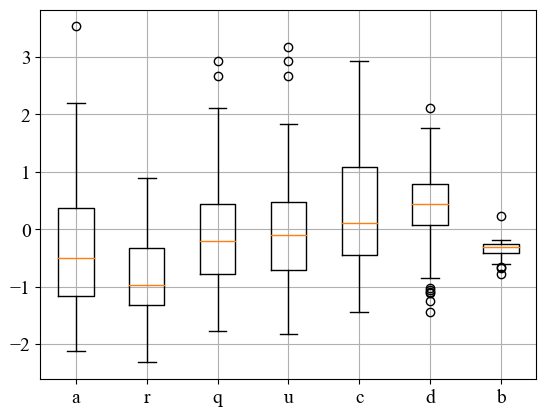

In [143]:
fig, ax = plt.subplots()
bp = ax.boxplot(df_sa, whis=1.5)
ax.set_xticklabels(['a', 'r','q', 'u','c', 'd', 'b'])
plt.grid()
plt.show()
figname='fig.5.pdf'
fig.savefig(figname)

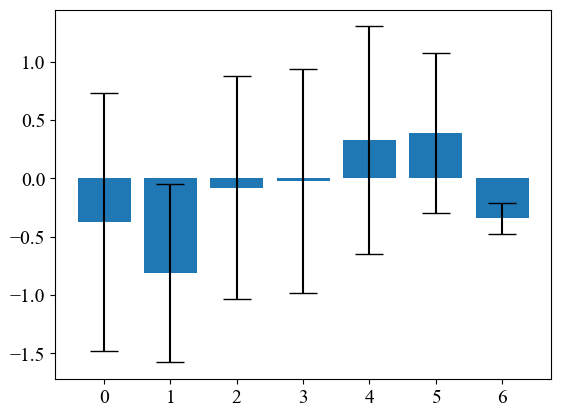

In [157]:
x=[0, 1, 2, 3, 4, 5, 6]
mean = df_sa.mean()
std=df_sa.std()
plt.bar(x, mean, yerr=std, capsize=10)
figname='fig.5_bar.pdf'
plt.savefig(figname)

In [151]:
print(mean, std)

0   -0.372664
1   -0.814910
2   -0.080669
3   -0.023335
4    0.325791
5    0.392491
6   -0.342060
dtype: float64 0    1.106887
1    0.763230
2    0.955607
3    0.956187
4    0.975775
5    0.685312
6    0.134610
dtype: float64
